# Genre Prediction - Exploratory Data Analysis

In [1]:
import os
from datetime import datetime, timedelta, date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import lyricsgenius
from spotify_client import *

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,track_id,track,artist,album,release_date,subgenre,genre,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode
0,0,27ycaQnQAxaPiyeg3nr2aB,Midnight Sky,Miley Cyrus,Midnight Sky,2020-01-01,pop,pop,223279,92,0.705,0.814,-5.466,0.0346,0.00115,0.003120,0.203,0.2590,110.000,minor
1,1,0prNGof3XqfTvNDxHonvdK,Scars To Your Beautiful,Alessia Cara,Know-It-All (Deluxe),2015-01-01,pop,pop,230226,73,0.573,0.739,-5.740,0.1290,0.02850,0.000000,0.111,0.4510,97.085,major
2,2,7JDWhC422Gtk1Bq0mL3OTC,feel something,Bea Miller,feel something,2019-01-01,pop,pop,180161,86,0.740,0.415,-8.914,0.0707,0.24200,0.000156,0.319,0.1560,136.029,major
3,3,1rfofaqEpACxVEHIZBJe6W,Havana (feat. Young Thug),Camila Cabello,Camila,2018-01-01,pop,pop,217306,82,0.765,0.523,-4.333,0.0300,0.18400,0.000036,0.132,0.3940,104.988,major
4,4,3e7sxremeOE3wTySiOhGiP,Dusk Till Dawn (feat. Sia) - Radio Edit,ZAYN,Icarus Falls,2017-01-01,pop,pop,239000,64,0.259,0.437,-6.589,0.0386,0.10200,0.000001,0.106,0.0951,180.042,minor


### Data Distributions

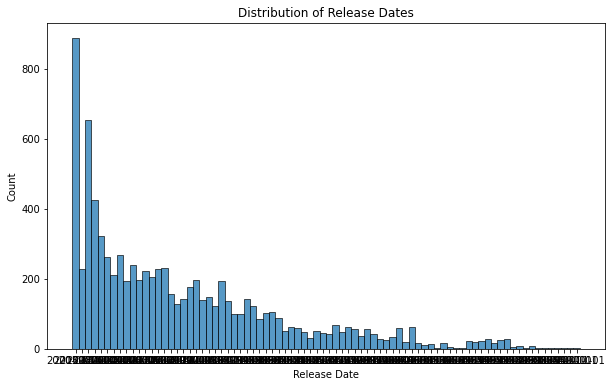

In [3]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Release Dates')
plt.xlabel('Release Date')
sns.histplot(df.release_date)
plt.show()

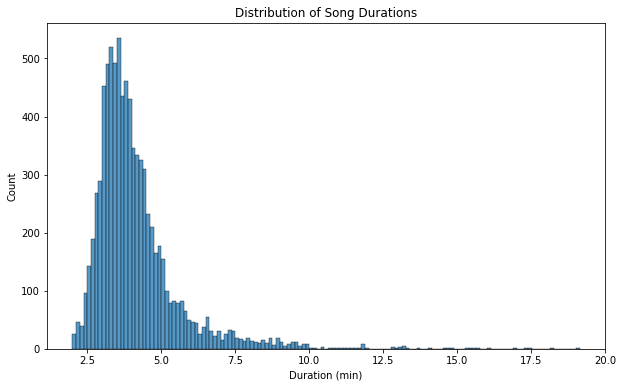

In [4]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (min)')
sns.histplot(df.duration_ms/60000)
plt.show()

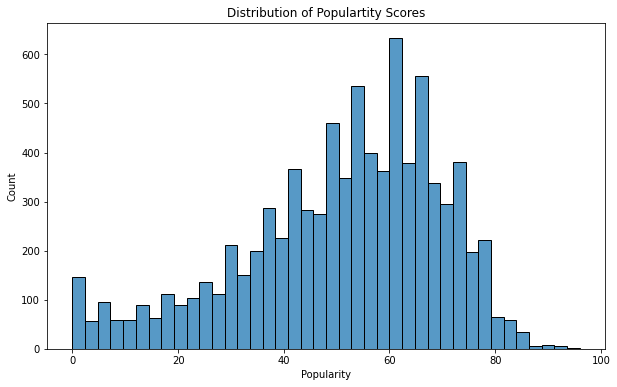

In [5]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Populartity Scores')
plt.xlabel('Popularity')
sns.histplot(df.popularity)
plt.show()

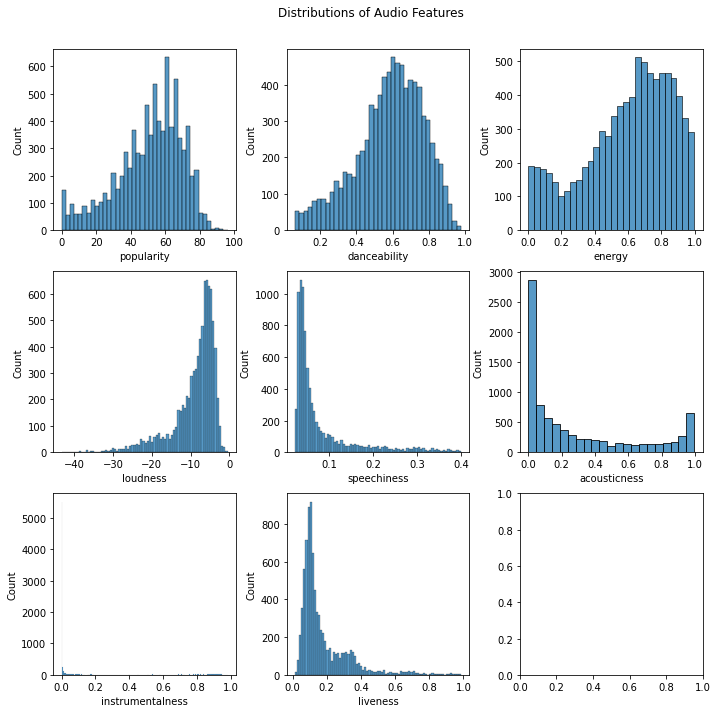

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(10,10))
fig.suptitle('Distributions of Audio Features')
fig.tight_layout(pad=2.0)
for i, column in enumerate(df.columns[9:17]):
    sns.histplot(df[column],ax=axes[i//3,i%3])